# Olivetti con clasificadores generativos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [4]:
orl = fetch_olivetti_faces()
X = orl.data
y = orl.target
X_train, X_test, y_train, y_test = train_test_split(
    orl.data, orl.target, test_size=0.3, shuffle=True, random_state=23)

Naive Bayes Gaussiano en función de var_smoothing:

In [3]:
for v in [1e-9, 1e-5, 1e-1, .2, .5, 1]:
    clf = GaussianNB(var_smoothing=v).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de GaussianNB() es 80.0%
La precisión de GaussianNB(var_smoothing=1e-05) es 80.0%
La precisión de GaussianNB(var_smoothing=0.1) es 86.7%
La precisión de GaussianNB(var_smoothing=0.2) es 85.8%
La precisión de GaussianNB(var_smoothing=0.5) es 82.5%
La precisión de GaussianNB(var_smoothing=1) es 80.8%


Medias de las Gaussianas aprendidas con el suavizado que ha obtenido mayor precisión:

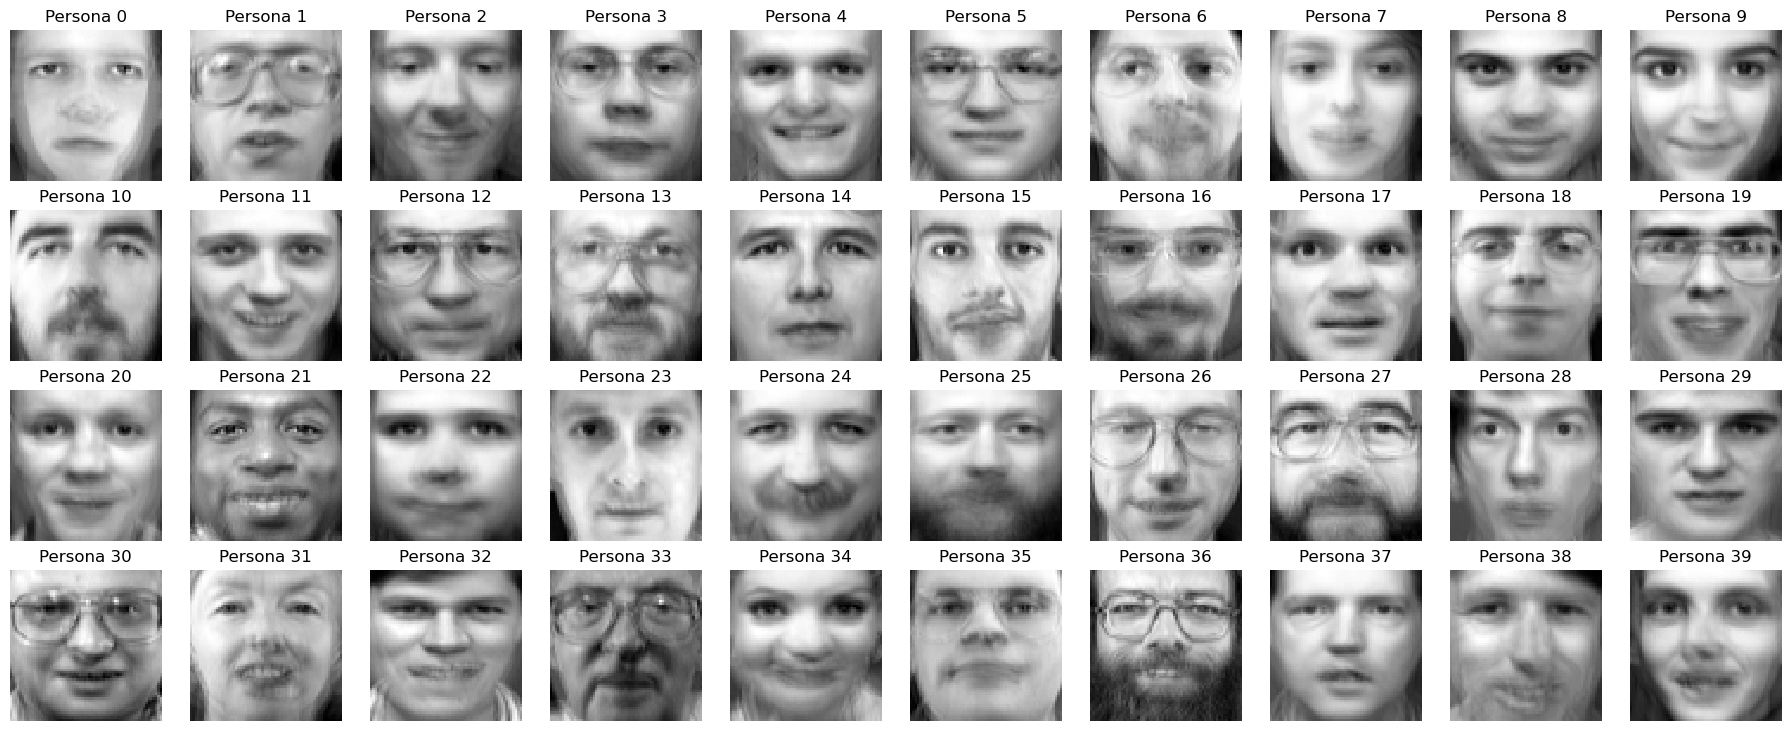

In [7]:
clf = GaussianNB(var_smoothing=0.1).fit(X_train, y_train)
nrows, ncols = 4, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 40):
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(clf.theta_[c].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("Persona {:}".format(c))

In [6]:
for v in [1e-9, 1e-5, 1e-1, .2, .5, 1]:
    clf = LinearDiscriminantAnalysis(tol=v).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de LinearDiscriminantAnalysis(tol=1e-09) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=0.2) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.5) es 94.2%
La precisión de LinearDiscriminantAnalysis(tol=1) es 0.8%


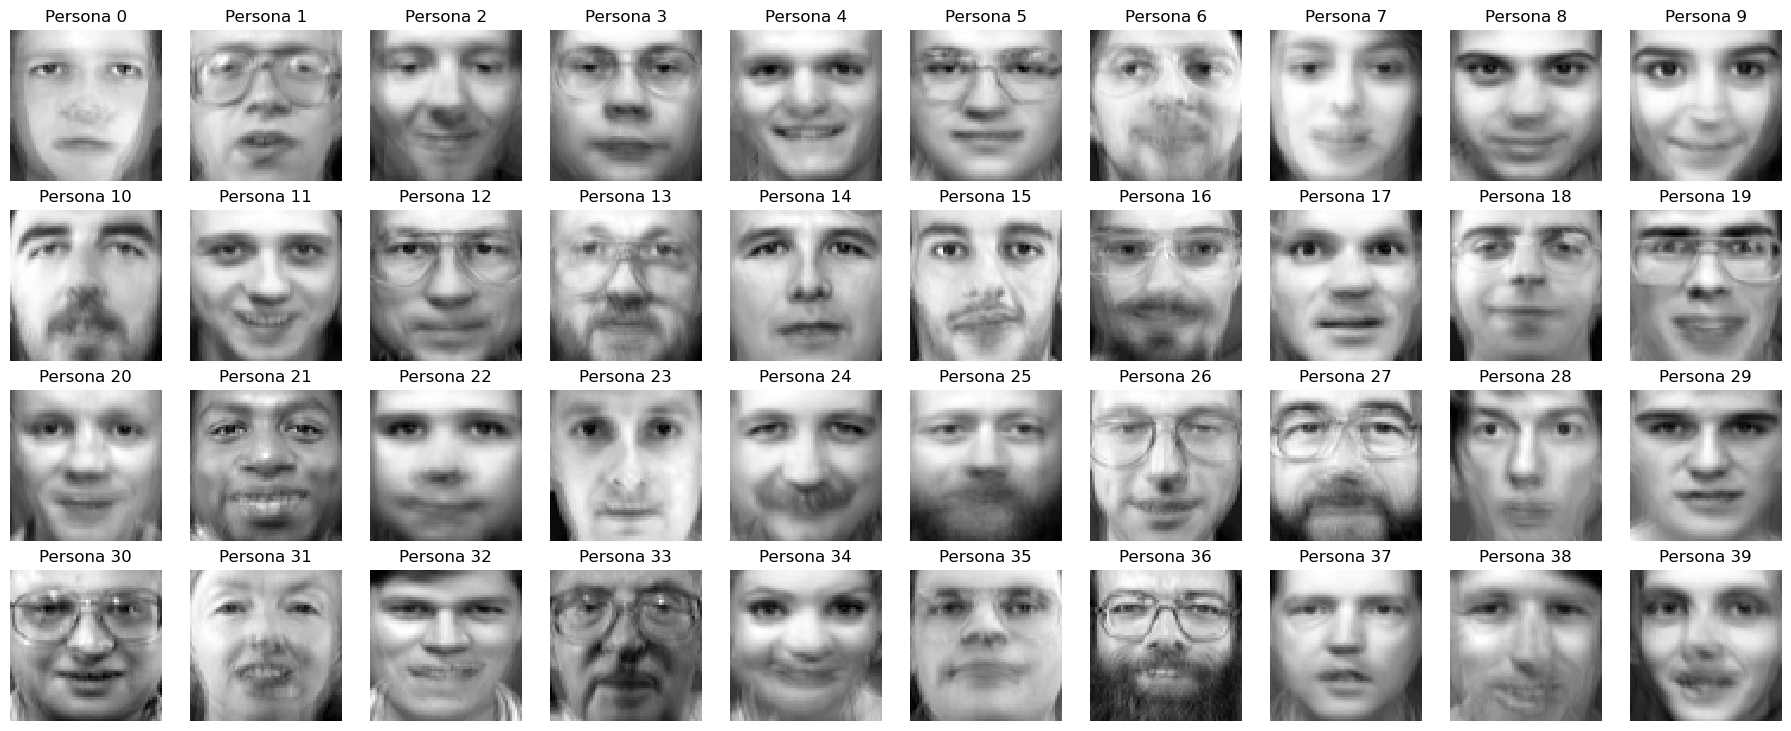

In [9]:
clf = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train)
nrows, ncols = 4, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 40):
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(clf.means_[c].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("Persona {:}".format(c))

In [5]:
data = fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=23)

lda = LinearDiscriminantAnalysis(tol=1e-20, store_covariance=True).fit(X_train, y_train)

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in np.arange(0,1):
    X = multivariate_normal(mean=lda.means_[i], cov=lda.covariance_, seed=23,  allow_singular=True).rvs(10)
    for j in np.arange(0, 1):
        ax = axes[i,j]
        ax.set_axis_off()
        ax.imshow(X[j].reshape(64,64), cmap=plt.cm.gray, interpolation="none")


KeyboardInterrupt: 

In [1]:
lda = LinearDiscriminantAnalysis(tol=1e-06).fit(X_train, y_train)
nrows, ncols = 4, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 40):
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(lda.means_[c].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("Persona {:}".format(c))

NameError: name 'LinearDiscriminantAnalysis' is not defined

**Ejercicio:** ¿Cómo crees que serán las medias aprendidas con otros valores de var_smoothing?

LDA en función de tol:

In [5]:
for tol in np.logspace(-16, 0, 9):
    clf = LinearDiscriminantAnalysis(tol=tol).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de LinearDiscriminantAnalysis(tol=1e-16) es 61.7%
La precisión de LinearDiscriminantAnalysis(tol=1e-14) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=1e-12) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=1e-10) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=1e-08) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 97.5%
La precisión de LinearDiscriminantAnalysis() es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 97.5%
La precisión de LinearDiscriminantAnalysis(tol=1.0) es 0.8%


QDA es difícil de entrenar a causa de la singularidad de las matrices de covarianzas de las clases.

**Ejercicio:** La precisión de LDA es mucho mejor que la de naive Bayes Gaussiano. ¿Cuál crees que es el motivo? ¿Se te ocurre alguna manera de compararlos (más allá de las precisiones halladas)?  